In [2]:
import pandas as pd

df = pd.read_csv('/Users/chentingkao/PracticeData/pokemon.csv', encoding = 'unicode_escape')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# create a boolean Series "types"
types = df['Type 1'].isin(['Grass', 'Fire', 'Water'])

# use the boolean Series to filter rows
df = df[types].drop(['Type 1', 'Type 2', 'Generation', 'Legendary'], axis = 1)

df.head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,318,45,49,49,65,65,45
1,2,Ivysaur,405,60,62,63,80,80,60
2,3,Venusaur,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,4,Charmander,309,39,52,43,60,50,65


In [17]:
from sklearn.cluster import KMeans
import numpy as np

# initialize the model
kmeans = KMeans(n_clusters = 3, random_state = 3)

# create clusters based on 'Attack' and 'Defense'
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])

# find x and y of all centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

df['cen_x'] = df.cluster.map({0: cen_x[0], 1: cen_x[1], 2: cen_x[2]})
df['cen_y'] = df.cluster.map({0: cen_y[0], 1: cen_y[1], 2: cen_y[2]})

# give all three clusters colors.
# map is convenient
colors = ['#DF2020', '#81DF20', '#2095DF']
df['colors'] = df.cluster.map({0: colors[0], 1: colors[1], 2: colors[2]})

df.head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster,colors,cen_x,cen_y
0,1,Bulbasaur,318,45,49,49,65,65,45,0,#DF2020,54.155963,53.660550
1,2,Ivysaur,405,60,62,63,80,80,60,0,#DF2020,54.155963,53.660550
2,3,Venusaur,525,80,82,83,100,100,80,2,#2095DF,101.493671,73.455696
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,#81DF20,85.152174,108.652174
4,4,Charmander,309,39,52,43,60,50,65,0,#DF2020,54.155963,53.660550


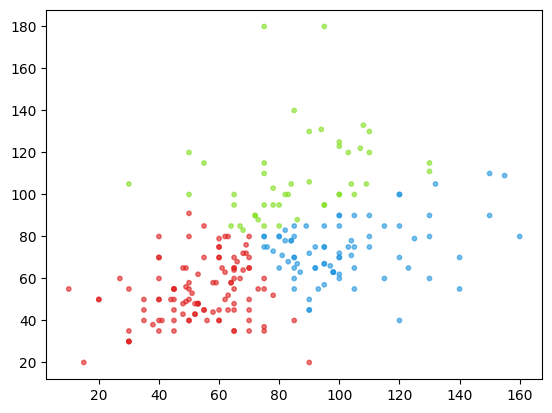

In [18]:
import matplotlib.pyplot as plt

plt.scatter(df.Attack, df.Defense, c = df.colors, alpha = 0.6, s = 10)

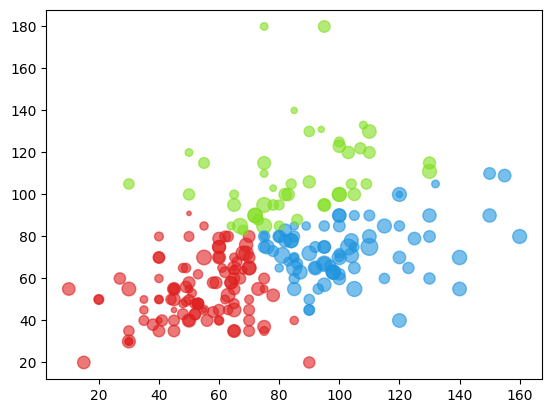

In [14]:
# use "speed" as the radius of the dots
plt.scatter(df.Attack, df.Defense, c = df.colors, alpha = 0.6, s = df.Speed)

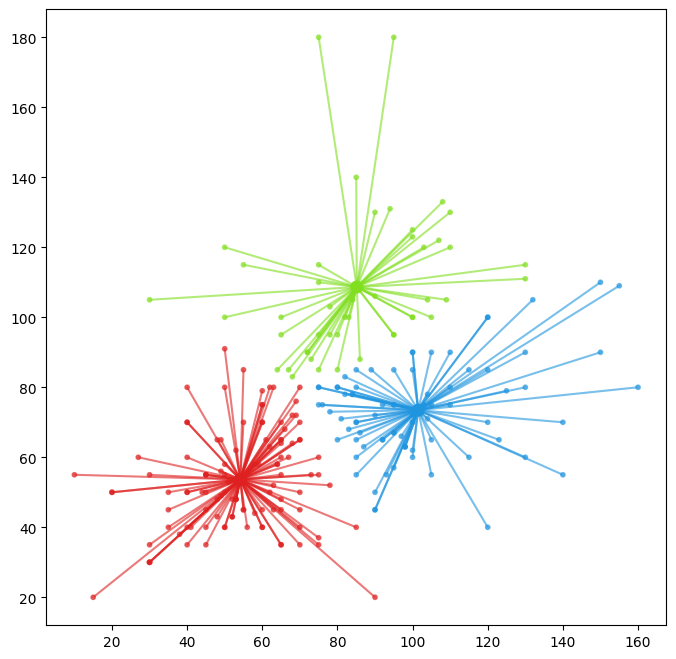

In [20]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

plt.scatter(df.Attack, df.Defense, c = df.colors, alpha = 0.6, s = 10)

plt.scatter(cen_x, cen_y, c = colors, s = 70)

for idx, val in df.iterrows():
  x = [val.Attack, val.cen_x]
  y = [val.Defense, val.cen_y]
  plt.plot(x, y, c = val.colors, alpha = 0.6)